In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import emcee

In [61]:
def roll(theta):
    theta1 = np.roll(theta, 1)
    theta2 = np.roll(theta, -1)
    return theta1, theta2

def pi(theta):
    theta1, _ = roll(theta)
    return np.sum(np.cos(theta-theta1))

def pih(xh, yt):
    return -np.log(pi(xh)) + k(yt)

k = lambda x: x**2 / 2

def logpi(theta, beta): # was actually dlogpi
    theta1, theta2 = roll(theta)
    return beta * (-np.sin(theta-theta1)-np.sin(theta-theta2))

def ode(yh, yt, h):
    for _ in range(10):
        y = yt + h/2 * logpi(yh, beta)
        y2h = yh + h * logpi(k(yt), beta)
        y2t = yt + h/2 * logpi(y2h, beta)
        yh, yt = y2h, y2t
    return y2h, y2t

def rec26(theta, h, beta, rej = False):
    xh = npr.choice([-1,1], size=L)
    yt = npr.randn(L**2).reshape(L,L)
    y2h, y2t = ode(xh, yt, h)
    if rej == False:
        xh = y2h
        return xh
    p = pih(xh, yt) / pih(y2h, y2t) * np.exp(yt-y2t)
    cond = npr.random() < p
    xh = cond * y2h + (1-cond) * xh
    return xh

def iter8(h, L, beta, rej = False):
    theta = npr.uniform(-np.pi, np.pi, size=L)
    itermax = int(100/h)
    M = np.zeros(itermax)
    for i in range(itermax):
        theta = rec26(theta, h, beta, rej=rej)
        M[i] = np.sum(np.cos(theta))
    return M

def get_iat(M):
    return emcee.autocorr.integrated_time(M, tol=0)[0]

In [62]:
L = 10
beta = 1/6
h0 = np.arange(.05, .16, .02)
res1 = np.zeros(6)
res2 = np.zeros(6)
for i in range(6):
    h = h0[i]
    M1 = iter8(h, L, beta)
    M2 = iter8(h, L, beta, rej=True)
    res1[i] = get_iat(M1)
    res2[i] = get_iat(M2)

C:\Users\zixia\AppData\Local\Temp\ipykernel_2128\4126723154.py:11: RuntimeWarning: invalid value encountered in log
  return -np.log(pi(xh)) + k(yt)


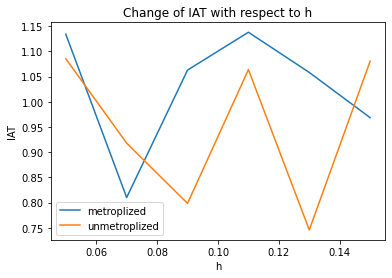

In [63]:
plt.plot(h0, res1, label="unmetroplized")
plt.plot(h0, res2, label="metroplized")
plt.xlabel("h")
plt.ylabel("IAT")
plt.title("Change of IAT with respect to h")
plt.legend()
plt.show()

In [64]:
L0 = list(map(int, np.logspace(1,2,6)))
beta = 1/6
h = .05
res3 = np.zeros(6)
res4 = np.zeros(6)
for i in range(6):
    L = L0[i]
    M3 = iter8(h, L, beta)
    M4 = iter8(h, L, beta, rej=True)
    res3[i] = get_iat(M3)
    res4[i] = get_iat(M4)

C:\Users\zixia\AppData\Local\Temp\ipykernel_2128\4126723154.py:11: RuntimeWarning: invalid value encountered in log
  return -np.log(pi(xh)) + k(yt)


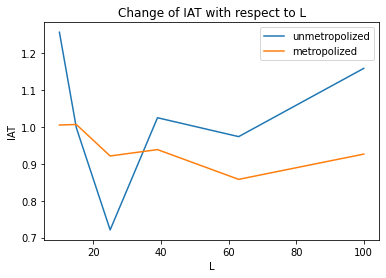

In [66]:
plt.plot(L0, res3, label="unmetropolized")
plt.plot(L0, res4, label="metropolized")
plt.xlabel("L")
plt.ylabel("IAT")
plt.title("Change of IAT with respect to L")
plt.legend()
plt.show()